# LunAPI : models

Links to notebooks in this repository: [Index](./00_overview.ipynb) | [Individuals](./01_indivs.ipynb) | [Projects](./02_projects.ipynb) | [Staging](./03_staging.ipynb) | [Models](./04_models.ipynb) | [Advanced](./98_advanced.ipynb) | [Reference](./99_reference.ipynb)

In [1]:
import lunapi as lp
proj = lp.proj()


initiated lunapi v0.0.4 <lunapi.lunapi0.luna object at 0xffff5bdc1070> 

enabling console outputs


In [4]:
proj.build( [ 'tutorial/' , '-ext=-profusion.xml' ] )

3

In [5]:
proj.sample_list()

[('learn-nsrr01',
  'tutorial//edfs/learn-nsrr01.edf',
  {'tutorial//edfs/learn-nsrr01-profusion.xml'}),
 ('learn-nsrr02',
  'tutorial//edfs/learn-nsrr02.edf',
  {'tutorial//edfs/learn-nsrr02-profusion.xml'}),
 ('learn-nsrr03',
  'tutorial//edfs/learn-nsrr03.edf',
  {'tutorial//edfs/learn-nsrr03-profusion.xml'})]

In [6]:
p = proj.inst( 1 ) 

 duration 09.57.30, 35850s | time 21.18.06 - 07.15.36 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT


In [7]:
lp.resources.POPS_PATH = '/Users/smp37/dropbox/projects/moonlight/pops/'
p.pops( 'EEG' )

 ..................................................................
 CMD #1: COPY
   options: sig=EEG tag=FLT
 copying EEG to EEG_FLT
 ..................................................................
 CMD #2: FILTER
   options: bandpass=0.3,35 ripple=0.01 sig=EEG_FLT tw=0.2
  filtering channel(s): EEG_FLT
 ..................................................................
 CMD #3: COPY
   options: sig=EEG_FLT tag=NORM
 copying EEG_FLT to EEG_FLT_NORM
 ..................................................................
 CMD #4: ROBUST-NORM
   options: epoch sig=EEG_FLT_NORM winsor=0.002
  set epochs to default 30 seconds, 1195 epochs
  iterating over epochs
  robust standardization of 1 signals, winsorizing at 0.002
 ..................................................................
 CMD #5: EDGER
   options: cache=ec1 sig=EEG_FLT
  skipping... cache ec1 not found for this individual...
  set 0 leading/trailing sleep epochs to '?' (given end-wake=120 and end-sleep=5)
  anchoring on sle

,PP_N1,PP_N2,PP_N3,PP_R,PP_W
0,0.000609,0.000331,0.000067,0.000108,0.998885
1,0.000571,0.000295,0.000062,0.000096,0.998975
2,0.000783,0.000401,0.00007,0.00013,0.998616
3,0.001172,0.000543,0.00007,0.00015,0.998065
4,0.001731,0.000896,0.00009,0.000213,0.997071
...,...,...,...,...,...
1190,None,None,None,None,None
1191,None,None,None,None,None
1192,None,None,None,None,None
1193,None,None,None,None,None


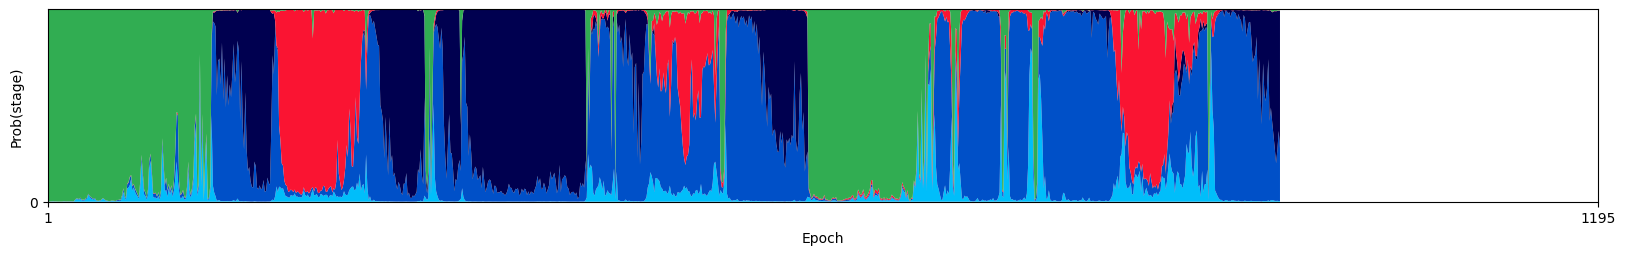

In [8]:
lp.hypno_density( p.table( 'POPS' , 'E' ) )

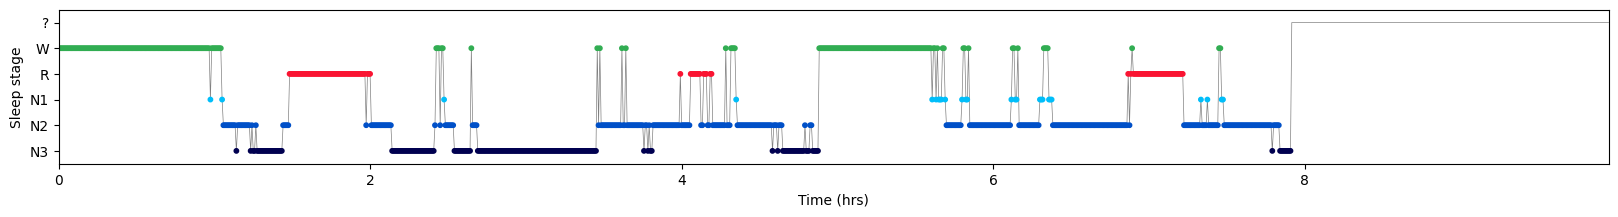

In [9]:
pp = p.table( 'POPS' , 'E' )
lp.hypno( pp[ 'PRED' ] )

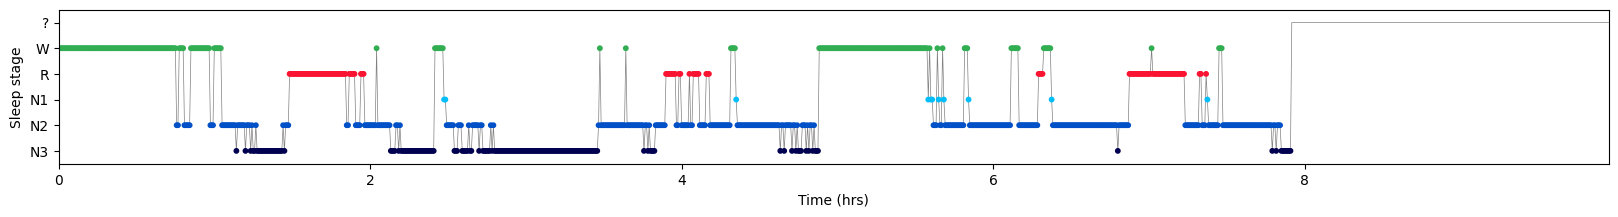

In [10]:
lp.hypno( pp[ 'PRIOR' ] )

In [11]:
p.eval( 'STAGE' )
pp = p.table( 'STAGE', 'E' )


 ..................................................................
 CMD #1: STAGE
   options: sig=*
  set 0 leading/trailing sleep epochs to '?' (given end-wake=120 and end-sleep=5)


In [12]:
p.eval( 'PSD sig=EEG,EEG_sec spectrum dB max=30' ) 

 ..................................................................
 CMD #1: PSD
   options: dB max=30 sig=EEG,EEG_sec spectrum
  calculating PSD from 0.5 to 30 for 2 signals


,Command,Stata
0,PSD,B_CH
1,PSD,CH
2,PSD,CH_F


In [13]:
proj.silence( True )
p.eval( 'PSD sig=EEG,EEG_sec spectrum epoch-spectrum dB max=30' ) 

silencing console outputs


,Command,Stata
0,PSD,B_CH
1,PSD,B_CH_E
2,PSD,CH
3,PSD,CH_E_F
4,PSD,CH_F


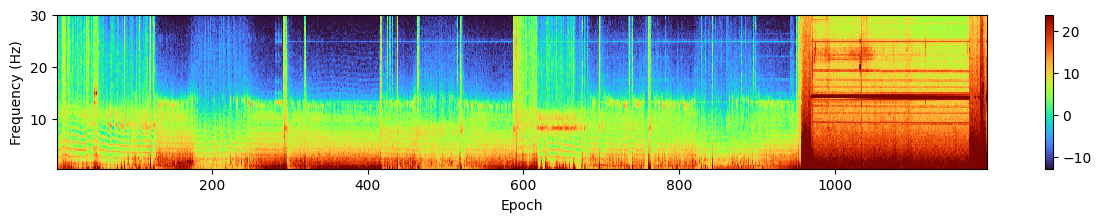

In [14]:
df = p.table( 'PSD' , 'CH_E_F' )
lp.spec( df ) 

In [15]:
df['CH'].unique()

array(['EEG', 'EEG_sec'], dtype=object)

In [16]:
import numpy as np
a = np.zeros(4, dtype=bool)
b = np.array( [1,2,3,4] )
c = np.array( [4,3,2,1] ) 
( b > 2 ) & ( c < 2 )

array([False, False, False,  True])

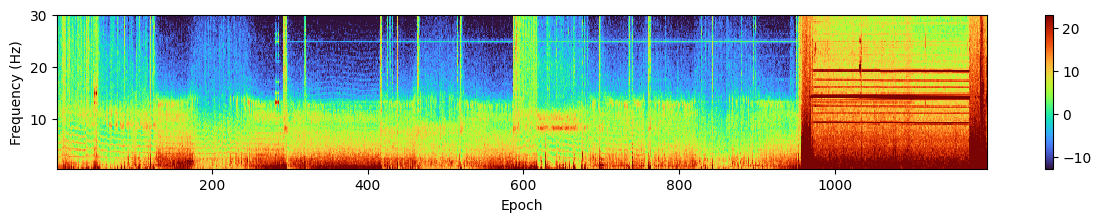

In [17]:
lp.spec( df , ch = 'EEG_sec' ) 

In [18]:
p.stat()

,Value
annotation_files,tutorial//edfs/learn-nsrr02-profusion.xml
duration,09.57.30.000
edf_file,tutorial//edfs/learn-nsrr02.edf
elen,30.0
id,learn-nsrr02
na,16
ne,1195
nem,0
ns,16
nt,14


In [19]:
p.eval( 'MASK ifnot=N2 & RE ' )

,Command,Stata
0,MASK,EMASK
1,RE,BL


In [20]:
p.eval( 'PSD sig=EEG,EEG_sec spectrum epoch-spectrum dB max=80' ) 
df = p.table( 'PSD' , 'CH_E_F' )

/Users/smp37/Library/Python/3.9/lib/python/site-packages/lunapi/lunapi1.py:754: RuntimeWarning: invalid value encountered in divide
  zi = zi / counts


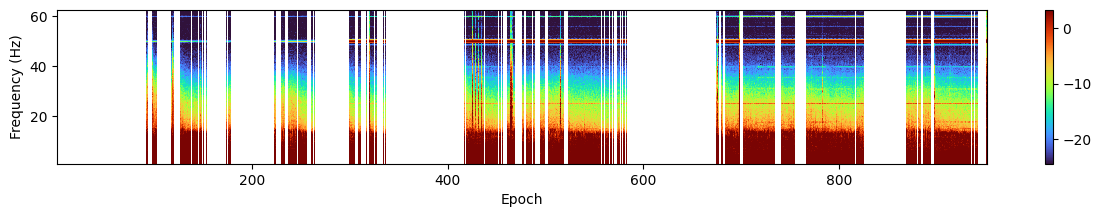

In [21]:
lp.spec( df , mine = 1 , minf=1 , w =0.2) 

In [22]:
p.refresh()
p.eval( 'SIGSTATS sig=EEG,EEG_sec epoch' )

,Command,Stata
0,SIGSTATS,CH
1,SIGSTATS,CH_E


In [23]:
p.table( 'SIGSTATS' , 'CH_E' )

,ID,CH,E,H1,H2,H3
0,learn-nsrr02,EEG,1,143.297921,0.670023,0.938615
1,learn-nsrr02,EEG,2,251.857552,0.623823,1.028647
2,learn-nsrr02,EEG,3,155.45709,0.603501,0.989781
3,learn-nsrr02,EEG,4,128.655746,0.552868,0.992734
4,learn-nsrr02,EEG,5,150.966087,0.406764,0.966643
...,...,...,...,...,...,...
2385,learn-nsrr02,EEG_sec,1191,14876.113605,0.498152,1.33983
2386,learn-nsrr02,EEG_sec,1192,15344.584384,0.372482,1.340464
2387,learn-nsrr02,EEG_sec,1193,14568.828893,0.436731,1.442699
2388,learn-nsrr02,EEG_sec,1194,15307.673082,0.319605,1.346626


In [24]:
res = p.table( 'SIGSTATS' , 'CH_E' )

In [25]:
def hplot( df , chs = None ):
   """Hjorth-plot for a	single signal"""
   if len(df)	== 0: return

   nchs = df[ 'CH' ].nunique()
   print(nchs)


In [26]:
hplot( res )

2


In [27]:
del p

In [28]:
q = proj.inst(2)

In [29]:
k = proj.inst(1)

In [30]:
del k

In [31]:
del q

In [32]:
p = proj.inst( 0 )

In [33]:
proj.clear()

In [34]:
proj

In [35]:
proj.sample_list()

[]

In [36]:
proj.opts()

{'anterio-frontal': 'AF7,AF3,AFZ,AF8,AF4',
 'anterior': 'FP1,AF7,AF3,F1,F3,F5,F7,FPZ,AFZ,FZ,FP2,AF8,AF4,F2,F4,F6,F8',
 'central': 'FT7,FC5,FC3,FC1,C1,C3,C5,T7,TP7,CP5,CP3,CP1,CPZ,FCZ,CZ,FT8,FC6,FC4,FC2,C2,C4,C6,T8,TP8,CP6,CP4,CP2',
 'centro-parietal': 'CP5,CP3,CP1,CPZ,CP6,CP4,CP2',
 'frontal': 'F1,F3,F5,F7,FZ,F2,F4,F6,F8',
 'fronto-central': 'FC5,FC3,FC1,FCZ,FC6,FC4,FC2',
 'left': 'FP1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,FC3,FC1,C1,C3,C5,T7,TP7,CP5,CP3,CP1,P1,P3,P5,P7,P9,PO7,PO3,O1',
 'mid-central': 'C1,C3,C5,CZ,C2,C4,C6',
 'midline': 'IZ,OZ,POZ,PZ,CPZ,FPZ,AFZ,FZ,FCZ,CZ',
 'occiptital': 'O1,IZ,OZ,O2',
 'parietal': 'P1,P3,P5,P7,P9,PZ,P2,P4,P6,P8,P10',
 'parieto-occipital': 'PO7,PO3,POZ,PO8,PO4',
 'posterior': 'P1,P3,P5,P7,P9,PO7,PO3,O1,IZ,OZ,POZ,PZ,P2,P4,P6,P8,P10,PO8,PO4,O2',
 'pre-frontal': 'FP1,FPZ,FP2',
 'right': 'FP2,AF8,AF4,F2,F4,F6,F8,FT8,FC6,FC4,FC2,C2,C4,C6,T8,TP8,CP6,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2',
 'sleep': 'N1,N2,N3,R',
 'temporal': 'FT7,T7,TP7,FT8,T8,TP8'}

In [37]:
p.refresh()

In [48]:
lp.resources.MODEL_PATH = '/Users/smp37/dropbox/projects/moonlight/models/'
proj.silence( False )
p.predict_SUN2019( 'EEG,EEG_sec' , age = 62 )

enabling console outputs


 ..................................................................
 CMD #1: FREEZE
   options: ORIG sig=*
  freezing state, with tag ORIG
  copied 40920 records
  currently 2 freeze(s): ALL ORIG
 ..................................................................
 CMD #2: CACHE
   options: cache=p1 record=MTM,MTM,B,CH,STG sig=*
  caching output from MTM, variable = MTM (strata = B,CH,STG) to cache p1
 ..................................................................
 CMD #3: CACHE
   options: cache=p1 record=MTM,SPECKURT,B,STG sig=*
  caching output from MTM, variable = SPECKURT (strata = B,STG) to cache p1
 ..................................................................
 CMD #4: CACHE
   options: cache=p1 record=MTM,RATIO,B1,B2,CH,STG sig=*
  caching output from MTM, variable = RATIO (strata = B1,B2,CH,STG) to cache p1
 ..................................................................
 CMD #5: CACHE
   options: cache=p1 record=STATS,KURT_MN,CH,STG sig=*
  caching output from STAT

In [49]:
p.table( 'PREDICT' )

,ID,NF,NF_OBS,OKAY,Y,Y1,YOBS
0,learn-nsrr01,13,13,1,48.199751,55.184805,62.0


In [40]:
p.ivar( 'age' , '62' )
p.ivar( 'cen' , 'EEG,EEG_sec' )
p.ivar( 'mpath' , lp.resources.MODEL_PATH )
p.ivar( 'th' , '3' )

In [41]:
p.ivars()

{'age': '62',
 'airflow': 'AIRFLOW',
 'cen': 'EEG,EEG_sec',
 'ecg': 'ECG',
 'eeg': 'EEG_sec,EEG',
 'effort': 'THOR_RES,ABDO_RES',
 'emg': 'EMG',
 'eog': 'EOG_L,EOG_R',
 'generic': '',
 'hr': 'PR',
 'ic': '',
 'ignore': '',
 'imf': '',
 'leg': '',
 'light': 'LIGHT',
 'mpath': '/Users/smp37/dropbox/projects/moonlight/models/',
 'oxygen': 'SaO2,OX_STAT',
 'position': 'POSITION',
 'ref': '',
 'snore': '',
 'th': '3'}

In [42]:
p.eval( lp.cmdfile( lp.resources.MODEL_PATH + '/m1-adult-age-luna.txt' ) )

,Command,Stata
0,EPOCH,BL
1,MASK,EMASK_STG
2,MTM,B1_B2_CH_STG
3,MTM,B_CH_STG
4,MTM,B_STG
5,MTM,CH_F_STG
6,PREDICT,BL
7,PREDICT,FTR
8,RE,BL
9,RE,STG


In [43]:
p.table( 'PREDICT' ) 

,ID,NF,NF_OBS,OKAY,Y,Y1,YOBS
0,learn-nsrr01,13,13,1,48.199751,55.184805,62.0


In [44]:
p.table( 'PREDICT' , 'FTR' ) 

,ID,FTR,B,D,IMP,M,REIMP,SD,X,Z
0,learn-nsrr01,COUPL_OVERLAP_C,-0.804678,-0.369296,0,366.302452,0,191.716141,197.0,-0.883089
1,learn-nsrr01,DENS_C,-1.665346,-2.21257,0,4.513583,0,1.9116,1.556405,-1.546965
2,learn-nsrr01,alpha_bandpower_kurtosis_C_N2,-3.184509,1.619934,0,7.331549,0,2.598451,11.342204,1.543479
3,learn-nsrr01,alpha_bandpower_mean_C_N1,2.29108,-1.329955,0,0.068193,0,0.047436,0.019173,-1.033394
4,learn-nsrr01,delta_alpha_mean_C_N3,-1.348501,-0.848207,0,1.343991,0,0.548411,0.535833,-1.473635
5,learn-nsrr01,delta_bandpower_kurtosis_C_N2,-1.868672,-1.808515,0,17.017404,0,4.071176,10.633706,-1.568023
6,learn-nsrr01,delta_bandpower_mean_C_N3,-2.620558,-0.859664,0,1.445,0,0.618704,0.556004,-1.436869
7,learn-nsrr01,delta_theta_mean_C_N3,1.386207,-1.050087,0,1.224915,0,0.458186,0.483852,-1.617386
8,learn-nsrr01,kurtosis_N2_C,-0.052233,-0.705377,0,2.851093,0,1.34911,1.892714,-0.710379
9,learn-nsrr01,kurtosis_N3_C,-1.247537,2.082909,0,1.086065,0,0.576482,1.938169,1.47811


# project level stuff

In [50]:
proj.eval( 'STATS' )

In [51]:
proj.strata()

NameError: name 'empty_result_set' is not defined